## Computational Physics Homework 3
# Wes Roberts

First task is to write a program that calculates, for a given kinetic energy  𝐸 , the deflection function solving the equations of motion at a number of equally spaced  𝑏  values

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot
from matplotlib.colors import ColorConverter as cc
import math

In [2]:
class particle2(object):    # create the particle class that we will use to solve the problem, as in central force problem
    
    def __init__(self, mass=1., x=0., y=0., vx=0., vy=0.):
        self.mass = mass
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
       
    def euler(self, fx, fy, dt):
        self.vx = self.vx + fx/self.mass*dt
        self.vy = self.vy + fy/self.mass*dt
        self.x = self.x + self.vx*dt
        self.y = self.y + self.vy*dt

My strategy will be to begin by rewriting the code for orbits from class, basically replacing the gravitational force by a Lennard-Jones force. This requires taking a gradient of the Lennard-Jones potential. 

$$V(r) = 4V_0 \left[ (\frac{a}{r})^{12} - (\frac{a}{r})^6 \right]$$

In spherical coordinates, when the function has no angular dependence, we can write the gradient as $\vec{\nabla} V = \frac{\partial{V}}{\partial{r}} \hat{r}$.

This gives a force of $$f_{x} = \frac{4V_0}{m} \left[ 12a^{12} \frac{1}{r^{14}} - 6a^6 \frac{1}{r^8} \right] x $$

$$f_{y} = \frac{4V_0}{m} \left[ 12a^{12} \frac{1}{r^{14}} - 6a^6 \frac{1}{r^8} \right] y $$

The particle is scattered into an angle of -7.724081249153918e-12 radians, or -4.4255725619265635e-10 degrees
The initial velocity was [0.7071067811865168,-6.143999999213568e-16]
The final velocity was [0.7071067808833804,-5.461750227370907e-12]


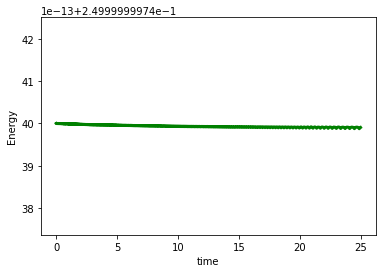

In [3]:
R = 50.                 # Starting radius, distance from origin
b = 1.                  # Impact parameter
V0 = 1.               # set the energy scale
a = 1.                  # set the length scale
m = 1.                  # set the particle mass

E = 0.25                  # problem statement asks us to set the initial kinetic energy

x0 = math.sqrt(R**2 - b**2)     # initial x needs to be calculated using R and b
y0 = b                          # initial y value is just b
v0x = math.sqrt(2*E/m)          # need to calculate initial x velocity from energy
v0y = 0.                        # no initial velocity in the y to start 

dt = 0.001                # time step
tmax = 25.
nsteps = int(tmax/dt)

x = np.zeros(nsteps)
y = np.zeros(nsteps)
vx = np.zeros(nsteps) 
vy = np.zeros(nsteps)
energy = np.zeros(nsteps)

x[0] = x0
y[0] = y0
vx[0] = v0x
vy[0] = v0y
energy[0] = 0.5*(v0y**2+v0x**2) - 4*V0*((a/R)**(12) - (a/R)**(6))    # change initial energy to kinetic + LJ Potential

p = particle2(1., x0, y0, v0x, v0y)

for i in range(0,nsteps):
    r = math.sqrt(p.x*p.x+p.y*p.y)
    r8 = r**(8)
    r14 = r**(14)
    fx = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.x
    fy = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.y
    p.euler(fx, fy, dt)

    x[i] = p.x
    y[i] = p.y
    vx[i] = p.vx
    vy[i] = p.vy
    energy[i] = 0.5*(p.vx**2+p.vy**2) + 4*V0*((a/math.sqrt(p.x*p.x+p.y*p.y))**(12) - (a/math.sqrt(p.x*p.x+p.y*p.y))**(6))

t = np.linspace(0.,tmax,nsteps)

theta = np.arctan(vy[-1]/vx[-1])    # Calculate the final angle using the final velocity

print(f'The particle is scattered into an angle of {theta} radians, or {theta*180/math.pi} degrees')
print(f'The initial velocity was [{vx[0]},{vy[0]}]')
print(f'The final velocity was [{vx[-1]},{vy[-1]}]')

pyplot.plot(t, energy, color='green', ls='-', lw=3)

pyplot.xlabel('time')
pyplot.ylabel('Energy');

Energy is roughly conserved, but seems to get worse as time goes.

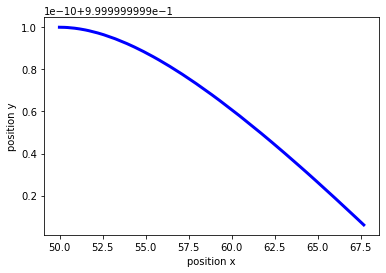

In [4]:
# Plot my positions to see what's happening

pyplot.plot(x, y, color='blue', ls='-', lw=3)

pyplot.xlabel('position x')
pyplot.ylabel('position y');

This sort of deflection is roughly what I expected, which is good.

Now I need to add something to the code to extract the final angle for a sample of evenly spaced b values. 

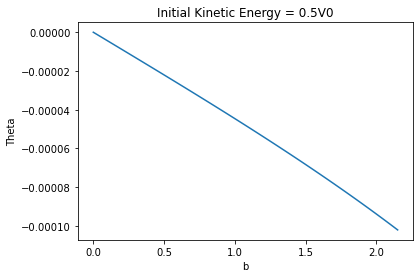

In [5]:
R = 5.                 
b = 0.         # initialize b          

db = 0.05        # increment for increasing b
bmax = 2*2**(1/6)       # upper bound on b, twice r_min
bsteps = int(bmax/db)

b_data = np.zeros(bsteps)               # an array of the b values, for plotting 
theta_data = np.zeros(bsteps)           # make an array of the same size for the angles

V0 = 1.              
a = 1.                  
m = 1.                  

E = 0.5  

dt = 0.001                
tmax = 25.
nsteps = int(tmax/dt)


for i in range(0, bsteps):
    x0 = math.sqrt(R**2 - b**2)     # initial x needs to be calculated using R and b
    y0 = b                          # initial y value is just b
    v0x = math.sqrt(2*E/m)          # need to calculate initial x velocity from energy
    v0y = 0.                        # no initial velocity in the y to start 

    p = particle2(1., x0, y0, v0x, v0y)
    
    x = np.zeros(nsteps)
    y = np.zeros(nsteps)
    vx = np.zeros(nsteps) 
    vy = np.zeros(nsteps)
    #energy = np.zeros(nsteps)
    
    for j in range(0, nsteps):
        r = math.sqrt(p.x*p.x+p.y*p.y)
        r8 = r**(8)
        r14 = r**(14)
        fx = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.x
        fy = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.y
        p.euler(fx, fy, dt)

        x[j] = p.x
        y[j] = p.y
        vx[j] = p.vx
        vy[j] = p.vy
        #energy[j] = 0.5*(p.vx**2+p.vy**2) + 4*V0*((a/math.sqrt(p.x*p.x+p.y*p.y))**(12) - (a/math.sqrt(p.x*p.x+p.y*p.y))**(6))

    theta_data[i] = np.arctan(vy[-1]/vx[-1])
    b_data[i] = b
        
    b += db
    
    
pyplot.plot(b_data, theta_data)
pyplot.xlabel('b')
pyplot.ylabel('Theta');
pyplot.title('Initial Kinetic Energy = 0.5V0');

A bit odd to me that the angle would increase (become more negative) as we increase the impact parameter... Try other initial energies.

First I will try $E = .1V0$

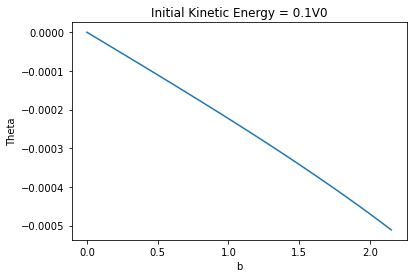

In [6]:
R = 5.                 
b = 0.         # initialize b          

db = 0.05        # increment for increasing b
bmax = 2*2**(1/6)       # upper bound on b, twice r_min
bsteps = int(bmax/db)

b_data = np.zeros(bsteps)               # an array of the b values, for plotting 
theta_data = np.zeros(bsteps)           # make an array of the same size for the angles

V0 = 1.              
a = 1.                  
m = 1.                  

E = 0.1  

dt = 0.001                
tmax = 25.
nsteps = int(tmax/dt)


for i in range(0, bsteps):
    x0 = math.sqrt(R**2 - b**2)     # initial x needs to be calculated using R and b
    y0 = b                          # initial y value is just b
    v0x = math.sqrt(2*E/m)          # need to calculate initial x velocity from energy
    v0y = 0.                        # no initial velocity in the y to start 

    p = particle2(1., x0, y0, v0x, v0y)
    
    x = np.zeros(nsteps)
    y = np.zeros(nsteps)
    vx = np.zeros(nsteps) 
    vy = np.zeros(nsteps)
    #energy = np.zeros(nsteps)
    
    for j in range(0, nsteps):
        r = math.sqrt(p.x*p.x+p.y*p.y)
        r8 = r**(8)
        r14 = r**(14)
        fx = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.x
        fy = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.y
        p.euler(fx, fy, dt)

        x[j] = p.x
        y[j] = p.y
        vx[j] = p.vx
        vy[j] = p.vy
        #energy[j] = 0.5*(p.vx**2+p.vy**2) + 4*V0*((a/math.sqrt(p.x*p.x+p.y*p.y))**(12) - (a/math.sqrt(p.x*p.x+p.y*p.y))**(6))

    theta_data[i] = np.arctan(vy[-1]/vx[-1])
    b_data[i] = b
        
    b += db
    
    
pyplot.plot(b_data, theta_data)
pyplot.xlabel('b')
pyplot.ylabel('Theta');
pyplot.title('Initial Kinetic Energy = 0.1V0');

# Here I change my initial conditions and things look a bit better, but I go a while without realizing that my particle is initially moving away from the scatterer. After some analysis of this situation, I figure the mistake out and point the particle at the scatterer to start. 

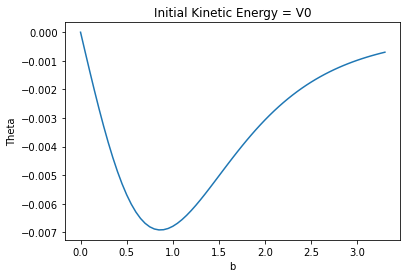

In [7]:
                 
b = 0.         # initialize b          

db = 0.05        # increment for increasing b
bmax = 3*2**(1/6)       # upper bound on b, twice r_min
bsteps = int(bmax/db)

b_data = np.zeros(bsteps)               # an array of the b values, for plotting 
theta_data = np.zeros(bsteps)           # make an array of the same size for the angles

V0 = 1.              
a = 1.                  
m = 1.                  

E = 1.  

dt = 0.001                
tmax = 25.
nsteps = int(tmax/dt)


for i in range(0, bsteps):
    x0 = 2.     # try changing the way I'm initializing
    y0 = b                          # initial y value is just b
    v0x = math.sqrt(2*E/m)          # need to calculate initial x velocity from energy
    v0y = 0.                        # no initial velocity in the y to start 

    p = particle2(1., x0, y0, v0x, v0y)
    
    x = np.zeros(nsteps)
    y = np.zeros(nsteps)
    vx = np.zeros(nsteps) 
    vy = np.zeros(nsteps)
    #energy = np.zeros(nsteps)
    
    b_data[i] = b
    
    for j in range(0, nsteps):
        r = math.sqrt(p.x*p.x+p.y*p.y)
        r8 = r**(8)
        r14 = r**(14)
        fx = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.x
        fy = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.y
        p.euler(fx, fy, dt)

        x[j] = p.x
        y[j] = p.y
        vx[j] = p.vx
        vy[j] = p.vy
        #energy[j] = 0.5*(p.vx**2+p.vy**2) + 4*V0*((a/math.sqrt(p.x*p.x+p.y*p.y))**(12) - (a/math.sqrt(p.x*p.x+p.y*p.y))**(6))
    
    theta_data[i] = np.arctan(vy[-1]/vx[-1])
        
    b += db
    
    
pyplot.plot(b_data, theta_data)
pyplot.xlabel('b')
pyplot.ylabel('Theta');
pyplot.title('Initial Kinetic Energy = V0');

This looks much more reasonable. I've changed the language of my initial conditions to be with respect to an x and y coordinate, rather than a radius. This is also a starting position of about 20 times closer than I was beginning in previous attempts.

Notice that the greatest scattering angle occurs near b = a. 

Now I will try this modification for different initial kinetic energies. 

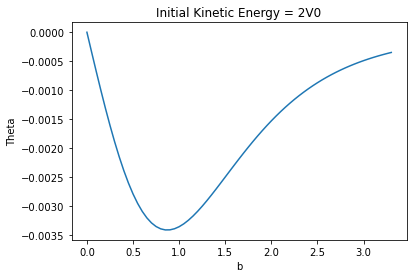

In [8]:
                 
b = 0.         # initialize b          

db = 0.05        # increment for increasing b
bmax = 3*2**(1/6)       # upper bound on b, twice r_min
bsteps = int(bmax/db)

b_data = np.zeros(bsteps)               # an array of the b values, for plotting 
theta_data = np.zeros(bsteps)           # make an array of the same size for the angles

V0 = 1.              
a = 1.                  
m = 1.                  

E = 2.  

dt = 0.001                
tmax = 25.
nsteps = int(tmax/dt)


for i in range(0, bsteps):
    x0 = 2.     # try changing the way I'm initializing
    y0 = b                          # initial y value is just b
    v0x = math.sqrt(2*E/m)          # need to calculate initial x velocity from energy
    v0y = 0.                        # no initial velocity in the y to start 

    p = particle2(1., x0, y0, v0x, v0y)
    
    x = np.zeros(nsteps)
    y = np.zeros(nsteps)
    vx = np.zeros(nsteps) 
    vy = np.zeros(nsteps)
    #energy = np.zeros(nsteps)
    
    b_data[i] = b
    
    for j in range(0, nsteps):
        r = math.sqrt(p.x*p.x+p.y*p.y)
        r8 = r**(8)
        r14 = r**(14)
        fx = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.x
        fy = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.y
        p.euler(fx, fy, dt)

        x[j] = p.x
        y[j] = p.y
        vx[j] = p.vx
        vy[j] = p.vy
        #energy[j] = 0.5*(p.vx**2+p.vy**2) + 4*V0*((a/math.sqrt(p.x*p.x+p.y*p.y))**(12) - (a/math.sqrt(p.x*p.x+p.y*p.y))**(6))
    
    theta_data[i] = np.arctan(vy[-1]/vx[-1])
        
    b += db
    
    
pyplot.plot(b_data, theta_data)
pyplot.xlabel('b')
pyplot.ylabel('Theta');
pyplot.title('Initial Kinetic Energy = 2V0');

At twice the initial kinetic energy, the maximum scattering angle is roughly diminished by half, which is at least intuitively what we would expect. The faster the incoming particle, the less it should scatter. I'll do a much larger energy next to see if this trend continues.

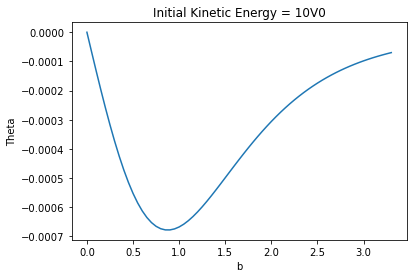

In [9]:
                 
b = 0.         # initialize b          

db = 0.05        # increment for increasing b
bmax = 3*2**(1/6)       # upper bound on b, twice r_min
bsteps = int(bmax/db)

b_data = np.zeros(bsteps)               # an array of the b values, for plotting 
theta_data = np.zeros(bsteps)           # make an array of the same size for the angles

V0 = 1.              
a = 1.                  
m = 1.                  

E = 10.  

dt = 0.001                
tmax = 25.
nsteps = int(tmax/dt)


for i in range(0, bsteps):
    x0 = 2.     # try changing the way I'm initializing
    y0 = b                          # initial y value is just b
    v0x = math.sqrt(2*E/m)          # need to calculate initial x velocity from energy
    v0y = 0.                        # no initial velocity in the y to start 

    p = particle2(1., x0, y0, v0x, v0y)
    
    x = np.zeros(nsteps)
    y = np.zeros(nsteps)
    vx = np.zeros(nsteps) 
    vy = np.zeros(nsteps)
    #energy = np.zeros(nsteps)
    
    b_data[i] = b
    
    for j in range(0, nsteps):
        r = math.sqrt(p.x*p.x+p.y*p.y)
        r8 = r**(8)
        r14 = r**(14)
        fx = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.x
        fy = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.y
        p.euler(fx, fy, dt)

        x[j] = p.x
        y[j] = p.y
        vx[j] = p.vx
        vy[j] = p.vy
        #energy[j] = 0.5*(p.vx**2+p.vy**2) + 4*V0*((a/math.sqrt(p.x*p.x+p.y*p.y))**(12) - (a/math.sqrt(p.x*p.x+p.y*p.y))**(6))
    
    theta_data[i] = np.arctan(vy[-1]/vx[-1])
        
    b += db
    
    
pyplot.plot(b_data, theta_data)
pyplot.xlabel('b')
pyplot.ylabel('Theta');
pyplot.title('Initial Kinetic Energy = 10V0');

Now the maximum angle is 10 times smaller. Check whether $E = 100V_{0}$ gives a factor of 100 decrease.

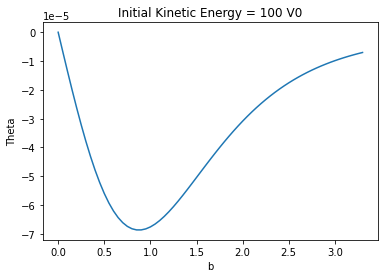

In [10]:
                 
b = 0.         # initialize b          

db = 0.05        # increment for increasing b
bmax = 3*2**(1/6)       # upper bound on b, twice r_min
bsteps = int(bmax/db)

b_data = np.zeros(bsteps)               # an array of the b values, for plotting 
theta_data = np.zeros(bsteps)           # make an array of the same size for the angles

V0 = 1.              
a = 1.                  
m = 1.                  

E = 100.  

dt = 0.001                
tmax = 25.
nsteps = int(tmax/dt)


for i in range(0, bsteps):
    x0 = 2.     # try changing the way I'm initializing
    y0 = b                          # initial y value is just b
    v0x = math.sqrt(2*E/m)          # need to calculate initial x velocity from energy
    v0y = 0.                        # no initial velocity in the y to start 

    p = particle2(1., x0, y0, v0x, v0y)
    
    x = np.zeros(nsteps)
    y = np.zeros(nsteps)
    vx = np.zeros(nsteps) 
    vy = np.zeros(nsteps)
    #energy = np.zeros(nsteps)
    
    b_data[i] = b
    
    for j in range(0, nsteps):
        r = math.sqrt(p.x*p.x+p.y*p.y)
        r8 = r**(8)
        r14 = r**(14)
        fx = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.x
        fy = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.y
        p.euler(fx, fy, dt)

        x[j] = p.x
        y[j] = p.y
        vx[j] = p.vx
        vy[j] = p.vy
        #energy[j] = 0.5*(p.vx**2+p.vy**2) + 4*V0*((a/math.sqrt(p.x*p.x+p.y*p.y))**(12) - (a/math.sqrt(p.x*p.x+p.y*p.y))**(6))
    
    theta_data[i] = np.arctan(vy[-1]/vx[-1])
        
    b += db
    
    
pyplot.plot(b_data, theta_data)
pyplot.xlabel('b')
pyplot.ylabel('Theta');
pyplot.title('Initial Kinetic Energy = 100 V0');

Looks good: 7E-5 for $E = 100V_{0}$ compared to an 7E-3 for $E = V_{0}$.

Now try for values of $E < V_{0}$

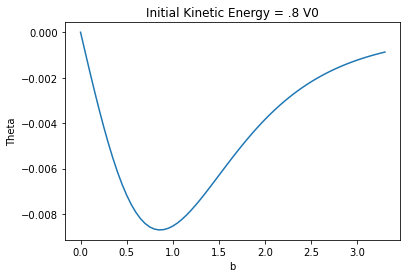

In [11]:
                 
b = 0.         # initialize b          

db = 0.05        # increment for increasing b
bmax = 3*2**(1/6)       # upper bound on b, twice r_min
bsteps = int(bmax/db)

b_data = np.zeros(bsteps)               # an array of the b values, for plotting 
theta_data = np.zeros(bsteps)           # make an array of the same size for the angles

V0 = 1.              
a = 1.                  
m = 1.                  

E = 0.8  

dt = 0.001                
tmax = 25.
nsteps = int(tmax/dt)


for i in range(0, bsteps):
    x0 = 2.     # try changing the way I'm initializing
    y0 = b                          # initial y value is just b
    v0x = math.sqrt(2*E/m)          # need to calculate initial x velocity from energy
    v0y = 0.                        # no initial velocity in the y to start 

    p = particle2(1., x0, y0, v0x, v0y)
    
    x = np.zeros(nsteps)
    y = np.zeros(nsteps)
    vx = np.zeros(nsteps) 
    vy = np.zeros(nsteps)
    #energy = np.zeros(nsteps)
    
    b_data[i] = b
    
    for j in range(0, nsteps):
        r = math.sqrt(p.x*p.x+p.y*p.y)
        r8 = r**(8)
        r14 = r**(14)
        fx = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.x
        fy = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.y
        p.euler(fx, fy, dt)

        x[j] = p.x
        y[j] = p.y
        vx[j] = p.vx
        vy[j] = p.vy
        #energy[j] = 0.5*(p.vx**2+p.vy**2) + 4*V0*((a/math.sqrt(p.x*p.x+p.y*p.y))**(12) - (a/math.sqrt(p.x*p.x+p.y*p.y))**(6))
    
    theta_data[i] = np.arctan(vy[-1]/vx[-1])
        
    b += db
    
    
pyplot.plot(b_data, theta_data)
pyplot.xlabel('b')
pyplot.ylabel('Theta');
pyplot.title('Initial Kinetic Energy = .8 V0');

Same general behavior, but scattering appears to be stronger.

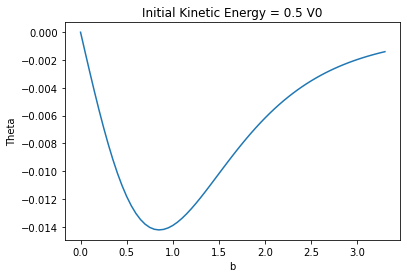

In [12]:
                 
b = 0.         # initialize b          

db = 0.05        # increment for increasing b
bmax = 3*2**(1/6)       # upper bound on b, twice r_min
bsteps = int(bmax/db)

b_data = np.zeros(bsteps)               # an array of the b values, for plotting 
theta_data = np.zeros(bsteps)           # make an array of the same size for the angles

V0 = 1.              
a = 1.                  
m = 1.                  

E = .5  

dt = 0.001                
tmax = 25.
nsteps = int(tmax/dt)


for i in range(0, bsteps):
    x0 = 2.     # try changing the way I'm initializing
    y0 = b                          # initial y value is just b
    v0x = math.sqrt(2*E/m)          # need to calculate initial x velocity from energy
    v0y = 0.                        # no initial velocity in the y to start 

    p = particle2(1., x0, y0, v0x, v0y)
    
    x = np.zeros(nsteps)
    y = np.zeros(nsteps)
    vx = np.zeros(nsteps) 
    vy = np.zeros(nsteps)
    #energy = np.zeros(nsteps)
    
    b_data[i] = b
    
    for j in range(0, nsteps):
        r = math.sqrt(p.x*p.x+p.y*p.y)
        r8 = r**(8)
        r14 = r**(14)
        fx = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.x
        fy = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.y
        p.euler(fx, fy, dt)

        x[j] = p.x
        y[j] = p.y
        vx[j] = p.vx
        vy[j] = p.vy
        #energy[j] = 0.5*(p.vx**2+p.vy**2) + 4*V0*((a/math.sqrt(p.x*p.x+p.y*p.y))**(12) - (a/math.sqrt(p.x*p.x+p.y*p.y))**(6))
    
    theta_data[i] = np.arctan(vy[-1]/vx[-1])
        
    b += db
    
    
pyplot.plot(b_data, theta_data)
pyplot.xlabel('b')
pyplot.ylabel('Theta');
pyplot.title('Initial Kinetic Energy = 0.5 V0');

Decreasing energy by half increases the maximum scattering angle by a factor of two!

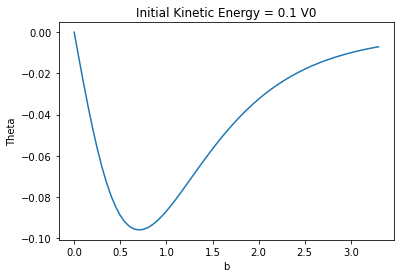

In [13]:
                 
b = 0.         # initialize b          

db = 0.05        # increment for increasing b
bmax = 3*2**(1/6)       # upper bound on b, twice r_min
bsteps = int(bmax/db)

b_data = np.zeros(bsteps)               # an array of the b values, for plotting 
theta_data = np.zeros(bsteps)           # make an array of the same size for the angles

V0 = 1.              
a = 1.                  
m = 1.                  

E = 0.1  

dt = 0.001                
tmax = 25.
nsteps = int(tmax/dt)


for i in range(0, bsteps):
    x0 = 2.     # try changing the way I'm initializing
    y0 = b                          # initial y value is just b
    v0x = math.sqrt(2*E/m)          # need to calculate initial x velocity from energy
    v0y = 0.                        # no initial velocity in the y to start 

    p = particle2(1., x0, y0, v0x, v0y)
    
    x = np.zeros(nsteps)
    y = np.zeros(nsteps)
    vx = np.zeros(nsteps) 
    vy = np.zeros(nsteps)
    #energy = np.zeros(nsteps)
    
    b_data[i] = b
    
    for j in range(0, nsteps):
        r = math.sqrt(p.x*p.x+p.y*p.y)
        r8 = r**(8)
        r14 = r**(14)
        fx = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.x
        fy = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.y
        p.euler(fx, fy, dt)

        x[j] = p.x
        y[j] = p.y
        vx[j] = p.vx
        vy[j] = p.vy
        #energy[j] = 0.5*(p.vx**2+p.vy**2) + 4*V0*((a/math.sqrt(p.x*p.x+p.y*p.y))**(12) - (a/math.sqrt(p.x*p.x+p.y*p.y))**(6))
    
    theta_data[i] = np.arctan(vy[-1]/vx[-1])
        
    b += db
    
    
pyplot.plot(b_data, theta_data)
pyplot.xlabel('b')
pyplot.ylabel('Theta');
pyplot.title('Initial Kinetic Energy = 0.1 V0');

Same characteristic behavior, but scatters much more strongly. Strangely, the peak seems to have shifted toward a lower value of b as well. 

Before moving on, I'm going to fix my initial code for one value of b using the x and y parameters rather than R, and moving the initial distance closer as in these last few trials. I want to see what the actual trajectory looks like. 

The particle is scattered into an angle of -0.0868476268308411 radians, or -4.976002478134324 degrees
The initial velocity was [0.4471380242999579,-3.778559999999999e-05]
The final velocity was [0.3680423865640182,-0.03204421298801333]


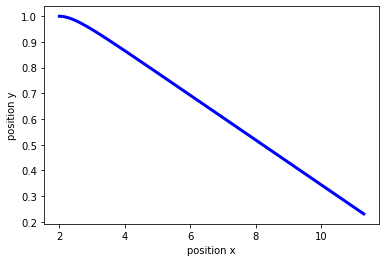

In [14]:

b = 1.      # Should roughly give maximum scattering.
V0 = 1.               # set the energy scale
a = 1.                  # set the length scale
m = 1.                  # set the particle mass

E = 0.1                  # problem statement asks us to set the initial kinetic energy

x0 = 2.     # Changed!
y0 = b                          # initial y value is just b
v0x = math.sqrt(2*E/m)          # need to calculate initial x velocity from energy
v0y = 0.                        # no initial velocity in the y to start 

dt = 0.001                # time step
tmax = 25.
nsteps = int(tmax/dt)

x = np.zeros(nsteps)
y = np.zeros(nsteps)
vx = np.zeros(nsteps) 
vy = np.zeros(nsteps)
energy = np.zeros(nsteps)

x[0] = x0
y[0] = y0
vx[0] = v0x
vy[0] = v0y
energy[0] = 0.5*(v0y**2+v0x**2) - 4*V0*((a/R)**(12) - (a/R)**(6))    # change initial energy to kinetic + LJ Potential

p = particle2(1., x0, y0, v0x, v0y)

for i in range(0,nsteps):
    r = math.sqrt(p.x*p.x+p.y*p.y)
    r8 = r**(8)
    r14 = r**(14)
    fx = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.x
    fy = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.y
    p.euler(fx, fy, dt)

    x[i] = p.x
    y[i] = p.y
    vx[i] = p.vx
    vy[i] = p.vy
    energy[i] = 0.5*(p.vx**2+p.vy**2) + 4*V0*((a/math.sqrt(p.x*p.x+p.y*p.y))**(12) - (a/math.sqrt(p.x*p.x+p.y*p.y))**(6))

t = np.linspace(0.,tmax,nsteps)

theta = np.arctan(vy[-1]/vx[-1])    # Calculate the final angle using the final velocity

print(f'The particle is scattered into an angle of {theta} radians, or {theta*180/math.pi} degrees')
print(f'The initial velocity was [{vx[0]},{vy[0]}]')
print(f'The final velocity was [{vx[-1]},{vy[-1]}]')


# Plot my positions to see what's happening

pyplot.plot(x, y, color='blue', ls='-', lw=3)

pyplot.xlabel('position x')
pyplot.ylabel('position y');


# I've noticed a possible mistake - I've been placing the particle in front of the potential to start, so that it's always running away. I can correct this by switching the sign of the initial x coordinate. 

The particle is scattered into an angle of 1.4917381548161504 radians, or 85.47030040959842 degrees
The initial velocity was [0.44728916669995794,-3.778559999999999e-05]
The final velocity was [0.029184125840549302,0.36837808928147026]


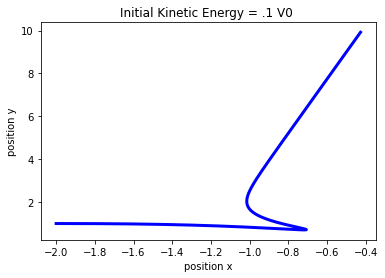

In [15]:
b = 1.      # Should roughly give maximum scattering.
V0 = 1.               # set the energy scale
a = 1.                  # set the length scale
m = 1.                  # set the particle mass

E = 0.1                  # problem statement asks us to set the initial kinetic energy

x0 = -2.     # Changed!
y0 = b                          # initial y value is just b
v0x = math.sqrt(2*E/m)          # need to calculate initial x velocity from energy
v0y = 0.                        # no initial velocity in the y to start 

dt = 0.001                # time step
tmax = 25.
nsteps = int(tmax/dt)

x = np.zeros(nsteps)
y = np.zeros(nsteps)
vx = np.zeros(nsteps) 
vy = np.zeros(nsteps)
energy = np.zeros(nsteps)

x[0] = x0
y[0] = y0
vx[0] = v0x
vy[0] = v0y
energy[0] = 0.5*(v0y**2+v0x**2) - 4*V0*((a/R)**(12) - (a/R)**(6))    # change initial energy to kinetic + LJ Potential

p = particle2(1., x0, y0, v0x, v0y)

for i in range(0,nsteps):
    r = math.sqrt(p.x*p.x+p.y*p.y)
    r8 = r**(8)
    r14 = r**(14)
    fx = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.x
    fy = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.y
    p.euler(fx, fy, dt)

    x[i] = p.x
    y[i] = p.y
    vx[i] = p.vx
    vy[i] = p.vy
    energy[i] = 0.5*(p.vx**2+p.vy**2) + 4*V0*((a/math.sqrt(p.x*p.x+p.y*p.y))**(12) - (a/math.sqrt(p.x*p.x+p.y*p.y))**(6))

t = np.linspace(0.,tmax,nsteps)

theta = np.arctan(vy[-1]/vx[-1])    # Calculate the final angle using the final velocity

print(f'The particle is scattered into an angle of {theta} radians, or {theta*180/math.pi} degrees')
print(f'The initial velocity was [{vx[0]},{vy[0]}]')
print(f'The final velocity was [{vx[-1]},{vy[-1]}]')


# Plot my positions to see what's happening

pyplot.plot(x, y, color='blue', ls='-', lw=3)

pyplot.xlabel('position x')
pyplot.ylabel('position y');
pyplot.title('Initial Kinetic Energy = .1 V0 ');


This is pretty cool - now we can clearly see a bounce at low energy. What about for a higher value?

The particle is scattered into an angle of 0.3291270901946234 radians, or 18.8575931915735 degrees
The initial velocity was [4.47221152619958,-3.778559999999999e-05]
The final velocity was [4.226505808651603,1.443562367315523]


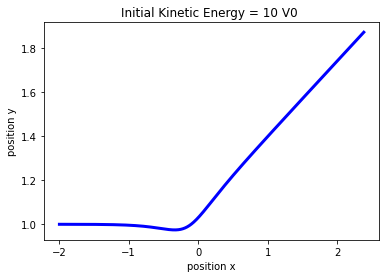

In [16]:
b = 1.      # Should roughly give maximum scattering.
V0 = 1.               # set the energy scale
a = 1.                  # set the length scale
m = 1.                  # set the particle mass

E = 10                  # problem statement asks us to set the initial kinetic energy

x0 = -2.     # Changed!
y0 = b                          # initial y value is just b
v0x = math.sqrt(2*E/m)          # need to calculate initial x velocity from energy
v0y = 0.                        # no initial velocity in the y to start 

dt = 0.001                # time step
tmax = 1.                # Because of the high energy it's coming in very quickly - need to decrease the time
nsteps = int(tmax/dt)

x = np.zeros(nsteps)
y = np.zeros(nsteps)
vx = np.zeros(nsteps) 
vy = np.zeros(nsteps)
energy = np.zeros(nsteps)

x[0] = x0
y[0] = y0
vx[0] = v0x
vy[0] = v0y
energy[0] = 0.5*(v0y**2+v0x**2) - 4*V0*((a/R)**(12) - (a/R)**(6))    # change initial energy to kinetic + LJ Potential

p = particle2(1., x0, y0, v0x, v0y)

for i in range(0,nsteps):
    r = math.sqrt(p.x*p.x+p.y*p.y)
    r8 = r**(8)
    r14 = r**(14)
    fx = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.x
    fy = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.y
    p.euler(fx, fy, dt)

    x[i] = p.x
    y[i] = p.y
    vx[i] = p.vx
    vy[i] = p.vy
    energy[i] = 0.5*(p.vx**2+p.vy**2) + 4*V0*((a/math.sqrt(p.x*p.x+p.y*p.y))**(12) - (a/math.sqrt(p.x*p.x+p.y*p.y))**(6))

t = np.linspace(0.,tmax,nsteps)

theta = np.arctan(vy[-1]/vx[-1])    # Calculate the final angle using the final velocity

print(f'The particle is scattered into an angle of {theta} radians, or {theta*180/math.pi} degrees')
print(f'The initial velocity was [{vx[0]},{vy[0]}]')
print(f'The final velocity was [{vx[-1]},{vy[-1]}]')


# Plot my positions to see what's happening

pyplot.plot(x, y, color='blue', ls='-', lw=3)

pyplot.xlabel('position x')
pyplot.ylabel('position y');
pyplot.title('Initial Kinetic Energy = 10 V0 ');



At very high energy, it's certainly deflected but does not bounce backwards.

# My apologies for the very long document, but because I noticed this mistake I'm now going to reproduce the theta vs b plots for the adjusted initial condition in which x is negative to start, moving toward the scatterer. 

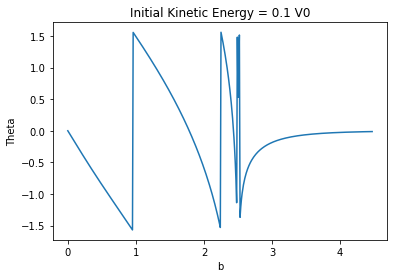

In [9]:
                 
b = 0.         # initialize b          

db = 0.01        # increment for increasing b
bmax = 4*2**(1/6)       # upper bound on b, twice r_min
bsteps = int(bmax/db)

b_data = np.zeros(bsteps)               # an array of the b values, for plotting 
theta_data = np.zeros(bsteps)           # make an array of the same size for the angles

V0 = 1.              
a = 1.                  
m = 1.                  

E = 0.1  

dt = 0.001                
tmax = 25.
nsteps = int(tmax/dt)


for i in range(0, bsteps):
    x0 = -2.                   # FIXING HERE!
    y0 = b                          
    v0x = math.sqrt(2*E/m)          
    v0y = 0.                        

    p = particle2(1., x0, y0, v0x, v0y)
    
    x = np.zeros(nsteps)
    y = np.zeros(nsteps)
    vx = np.zeros(nsteps) 
    vy = np.zeros(nsteps)
    #energy = np.zeros(nsteps)
    
    b_data[i] = b
    
    for j in range(0, nsteps):
        r = math.sqrt(p.x*p.x+p.y*p.y)
        r8 = r**(8)
        r14 = r**(14)
        fx = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.x
        fy = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.y
        p.euler(fx, fy, dt)

        x[j] = p.x
        y[j] = p.y
        vx[j] = p.vx
        vy[j] = p.vy
        #energy[j] = 0.5*(p.vx**2+p.vy**2) + 4*V0*((a/math.sqrt(p.x*p.x+p.y*p.y))**(12) - (a/math.sqrt(p.x*p.x+p.y*p.y))**(6))
    
    theta_data[i] = (np.arctan((vy[-1]/vx[-1])))
        
    b += db
    
    
pyplot.plot(b_data, theta_data)
pyplot.xlabel('b')
pyplot.ylabel('Theta');
pyplot.title('Initial Kinetic Energy = 0.1 V0');



Possibly different regimes for the b values? I also think it may be a problem that the arctangent function seems to only go from -pi/2 to pi/2. I think that's what is happening in the awkward discontinuity at b = 1, for example. Breaking some of these regions down, it looks like at b = 0 there is no scattering (or a bounce backwards). As b increases to 1, we have stronger and stronger downward scattering. At b = 1 (that is, b = a) the scattering flips: suddenly it scatters upward rather than downward. I'm going to plot two trajectories, both near 1, and see what it looks like. 

Notice that the tail makes sense as well - as b grows past 3a or so, we stop getting any scattering phenomena. The particle is simply too far away to be appreciably affected by the potential. 

Adding code to calculate the differential cross section:

(-0.5, 0.5)

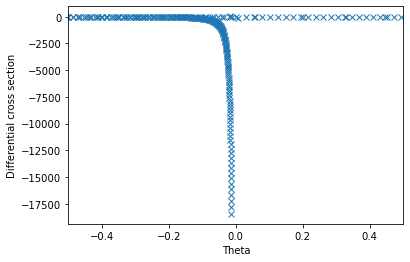

In [30]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

diff_cross = np.zeros(bsteps) # make an empty array

for i in range(bsteps - 1):       # bsteps - 1 because I want to use the final point but not evaluate at it
    diff_cross[i] = (theta_data[i + 1] - theta_data[i])/db          # numerical derivative
    
    if abs(diff_cross[i]) == 0.:
        diff_cross[i] = 0
        
    elif abs(theta_data[i]) == 0.:        # I essentially need conditions that keep the algorithm from dividing by zero
        diff_cross[i] = 0
    
    else:
        diff_cross[i] = (b_data[i]/np.sin(theta_data[i]))/diff_cross[i]   # only do this if there's no 1/0
                     
pyplot.plot(theta_data, diff_cross, 'x')    
pyplot.xlabel('Theta')
pyplot.ylabel('Differential cross section');
pyplot.xlim(-.5,.5)

# it seems to be entering lots of values as zero...


<ipython-input-8-f3a999eef146>:16: RuntimeWarning: invalid value encountered in double_scalars
  diff_cross[i] = b_data[i]/np.sin(theta_data[i])/diff_cross[i]


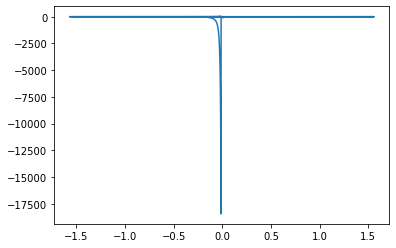

In [8]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

diff_cross = np.zeros(bsteps) # make an empty array

for i in range(bsteps - 1):       # bsteps - 1 because I want to use the final point but not evaluate at it
    diff_cross[i] = (theta_data[i + 1] - theta_data[i])/db          # numerical derivative
    
    
    #diff_cross[i] = (b_data[i]/np.sin(theta_data[i])/diff_cross[i] 
    
# Try building the actual differential cross section from this derivative

for i in range(bsteps - 1):
    if diff_cross[i] == 0:
        diff_cross[i] = 0
    elif b_
        diff_cross[i] = b_data[i]/np.sin(theta_data[i])/diff_cross[i]
                     
pyplot.plot(theta_data, diff_cross)   ; 



The particle is scattered into an angle of -1.4893419288423395 radians, or -85.33300677453943 degrees
The initial velocity was [0.4473016567472967,-3.962756130246719e-05]
The final velocity was [-0.029201381788266926,0.3577065447199455]


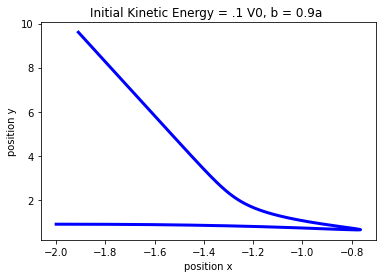

In [19]:
b = 0.9      # Should roughly give maximum scattering.
V0 = 1.               # set the energy scale
a = 1.                  # set the length scale
m = 1.                  # set the particle mass

E = 0.1                  # problem statement asks us to set the initial kinetic energy

x0 = -2.     # Changed!
y0 = b                          # initial y value is just b
v0x = math.sqrt(2*E/m)          # need to calculate initial x velocity from energy
v0y = 0.                        # no initial velocity in the y to start 

dt = 0.001                # time step
tmax = 25.
nsteps = int(tmax/dt)

x = np.zeros(nsteps)
y = np.zeros(nsteps)
vx = np.zeros(nsteps) 
vy = np.zeros(nsteps)
energy = np.zeros(nsteps)

x[0] = x0
y[0] = y0
vx[0] = v0x
vy[0] = v0y
energy[0] = 0.5*(v0y**2+v0x**2) - 4*V0*((a/R)**(12) - (a/R)**(6))    # change initial energy to kinetic + LJ Potential

p = particle2(1., x0, y0, v0x, v0y)

for i in range(0,nsteps):
    r = math.sqrt(p.x*p.x+p.y*p.y)
    r8 = r**(8)
    r14 = r**(14)
    fx = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.x
    fy = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.y
    p.euler(fx, fy, dt)

    x[i] = p.x
    y[i] = p.y
    vx[i] = p.vx
    vy[i] = p.vy
    energy[i] = 0.5*(p.vx**2+p.vy**2) + 4*V0*((a/math.sqrt(p.x*p.x+p.y*p.y))**(12) - (a/math.sqrt(p.x*p.x+p.y*p.y))**(6))

t = np.linspace(0.,tmax,nsteps)

theta = np.arctan(vy[-1]/vx[-1])    # Calculate the final angle using the final velocity

print(f'The particle is scattered into an angle of {theta} radians, or {theta*180/math.pi} degrees')
print(f'The initial velocity was [{vx[0]},{vy[0]}]')
print(f'The final velocity was [{vx[-1]},{vy[-1]}]')


# Plot my positions to see what's happening

pyplot.plot(x, y, color='blue', ls='-', lw=3)

pyplot.xlabel('position x')
pyplot.ylabel('position y');
pyplot.title('Initial Kinetic Energy = .1 V0, b = 0.9a ');



We see that it does bounce backwards. What about for b > 1 ?

The particle is scattered into an angle of 1.328066376719238 radians, or 76.09259829924359 degrees
The initial velocity was [0.44727782057541643,-3.532379150217605e-05]
The final velocity was [0.09116583145996139,0.3681800628123416]


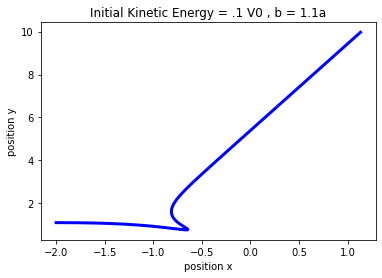

In [20]:
b = 1.1      # Should roughly give maximum scattering.
V0 = 1.               # set the energy scale
a = 1.                  # set the length scale
m = 1.                  # set the particle mass

E = 0.1                  # problem statement asks us to set the initial kinetic energy

x0 = -2.     # Changed!
y0 = b                          # initial y value is just b
v0x = math.sqrt(2*E/m)          # need to calculate initial x velocity from energy
v0y = 0.                        # no initial velocity in the y to start 

dt = 0.001                # time step
tmax = 25.
nsteps = int(tmax/dt)

x = np.zeros(nsteps)
y = np.zeros(nsteps)
vx = np.zeros(nsteps) 
vy = np.zeros(nsteps)
energy = np.zeros(nsteps)

x[0] = x0
y[0] = y0
vx[0] = v0x
vy[0] = v0y
 

p = particle2(1., x0, y0, v0x, v0y)

for i in range(0,nsteps):
    r = math.sqrt(p.x*p.x+p.y*p.y)
    r8 = r**(8)
    r14 = r**(14)
    fx = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.x
    fy = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.y
    p.euler(fx, fy, dt)

    x[i] = p.x
    y[i] = p.y
    vx[i] = p.vx
    vy[i] = p.vy
   

t = np.linspace(0.,tmax,nsteps)

theta = np.arctan(vy[-1]/vx[-1])    # Calculate the final angle using the final velocity

print(f'The particle is scattered into an angle of {theta} radians, or {theta*180/math.pi} degrees')
print(f'The initial velocity was [{vx[0]},{vy[0]}]')
print(f'The final velocity was [{vx[-1]},{vy[-1]}]')


# Plot my positions to see what's happening

pyplot.plot(x, y, color='blue', ls='-', lw=3)

pyplot.xlabel('position x')
pyplot.ylabel('position y');
pyplot.title('Initial Kinetic Energy = .1 V0 , b = 1.1a');



Now it scatters forward. That's why there's a discontinuity in theta in this region. 

Plot theta for a few more energies. 

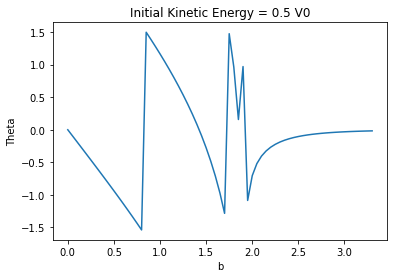

In [31]:
                 
b = 0.         # initialize b          

db = 0.05        # increment for increasing b
bmax = 3*2**(1/6)       # upper bound on b, twice r_min
bsteps = int(bmax/db)

b_data = np.zeros(bsteps)               # an array of the b values, for plotting 
theta_data = np.zeros(bsteps)           # make an array of the same size for the angles

V0 = 1.              
a = 1.                  
m = 1.                  

E = 0.5  

dt = 0.001                
tmax = 25.
nsteps = int(tmax/dt)


for i in range(0, bsteps):
    x0 = -2.     # try changing the way I'm initializing
    y0 = b                          # initial y value is just b
    v0x = math.sqrt(2*E/m)          # need to calculate initial x velocity from energy
    v0y = 0.                        # no initial velocity in the y to start 

    p = particle2(1., x0, y0, v0x, v0y)
    
    x = np.zeros(nsteps)
    y = np.zeros(nsteps)
    vx = np.zeros(nsteps) 
    vy = np.zeros(nsteps)
    #energy = np.zeros(nsteps)
    
    b_data[i] = b
    
    for j in range(0, nsteps):
        r = math.sqrt(p.x*p.x+p.y*p.y)
        r8 = r**(8)
        r14 = r**(14)
        fx = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.x
        fy = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.y
        p.euler(fx, fy, dt)

        x[j] = p.x
        y[j] = p.y
        vx[j] = p.vx
        vy[j] = p.vy
        #energy[j] = 0.5*(p.vx**2+p.vy**2) + 4*V0*((a/math.sqrt(p.x*p.x+p.y*p.y))**(12) - (a/math.sqrt(p.x*p.x+p.y*p.y))**(6))
    
    theta_data[i] = np.arctan(vy[-1]/vx[-1])
        
    b += db
    
    
pyplot.plot(b_data, theta_data)
pyplot.xlabel('b')
pyplot.ylabel('Theta');
pyplot.title('Initial Kinetic Energy = 0.5 V0');

And the cross section...

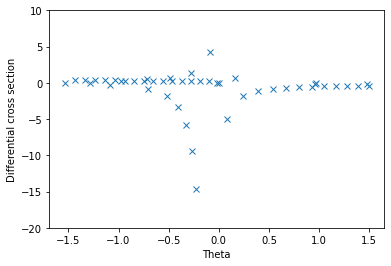

In [39]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

diff_cross = np.zeros(bsteps) # make an empty array

for i in range(bsteps - 1):       # bsteps - 1 because I want to use the final point but not evaluate at it
    diff_cross[i] = (theta_data[i + 1] - theta_data[i])/db          # numerical derivative
    
    if abs(diff_cross[i]) == 0.:
        diff_cross[i] = 0
        
    elif abs(theta_data[i]) == 0.:        # I essentially need conditions that keep the algorithm from dividing by zero
        diff_cross[i] = 0
    
    else:
        diff_cross[i] = (b_data[i]/np.sin(theta_data[i]))/diff_cross[i]   # only do this if there's no 1/0
                     
pyplot.plot(theta_data, diff_cross, 'x')    
pyplot.xlabel('Theta')
pyplot.ylabel('Differential cross section');
#pyplot.xlim(0.5,1.5);
pyplot.ylim(-20,10);

# Doesn't look like what I would expect - assigning zero to too many theta values.

Maybe this means it is very unlikely to scatter into large angles at this energy.

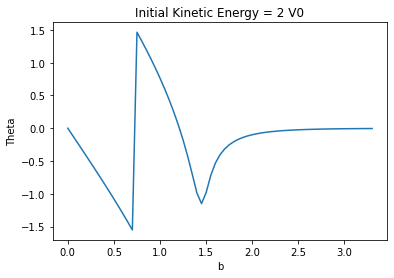

In [41]:
                 
b = 0.         # initialize b          

db = 0.05        # increment for increasing b
bmax = 3*2**(1/6)       # upper bound on b, twice r_min
bsteps = int(bmax/db)

b_data = np.zeros(bsteps)               # an array of the b values, for plotting 
theta_data = np.zeros(bsteps)           # make an array of the same size for the angles

V0 = 1.              
a = 1.                  
m = 1.                  

E = 2.  

dt = 0.001                
tmax = 25.
nsteps = int(tmax/dt)


for i in range(0, bsteps):
    x0 = -2.     # try changing the way I'm initializing
    y0 = b                          # initial y value is just b
    v0x = math.sqrt(2*E/m)          # need to calculate initial x velocity from energy
    v0y = 0.                        # no initial velocity in the y to start 

    p = particle2(1., x0, y0, v0x, v0y)
    
    x = np.zeros(nsteps)
    y = np.zeros(nsteps)
    vx = np.zeros(nsteps) 
    vy = np.zeros(nsteps)
    #energy = np.zeros(nsteps)
    
    b_data[i] = b
    
    for j in range(0, nsteps):
        r = math.sqrt(p.x*p.x+p.y*p.y)
        r8 = r**(8)
        r14 = r**(14)
        fx = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.x
        fy = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.y
        p.euler(fx, fy, dt)

        x[j] = p.x
        y[j] = p.y
        vx[j] = p.vx
        vy[j] = p.vy
        #energy[j] = 0.5*(p.vx**2+p.vy**2) + 4*V0*((a/math.sqrt(p.x*p.x+p.y*p.y))**(12) - (a/math.sqrt(p.x*p.x+p.y*p.y))**(6))
    
    theta_data[i] = np.arctan(vy[-1]/vx[-1])
        
    b += db
    
    
pyplot.plot(b_data, theta_data)
pyplot.xlabel('b')
pyplot.ylabel('Theta');
pyplot.title('Initial Kinetic Energy = 2 V0');

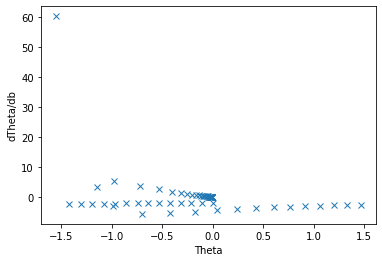

In [45]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

diff_cross = np.zeros(bsteps) # make an empty array

for i in range(bsteps - 1):       # bsteps - 1 because I want to use the final point but not evaluate at it
    diff_cross[i] = (theta_data[i + 1] - theta_data[i])/db          # numerical derivative
    
    #if abs(diff_cross[i]) == 0.:
        #diff_cross[i] = 0
        
    #elif abs(theta_data[i]) == 0.:        # I essentially need conditions that keep the algorithm from dividing by zero
        #diff_cross[i] = 0
    
    #else:
        #diff_cross[i] = (b_data[i]/np.sin(theta_data[i]))/diff_cross[i]   # only do this if there's no 1/0
                     
pyplot.plot(theta_data, diff_cross, 'x')    
pyplot.xlabel('Theta')
pyplot.ylabel('dTheta/db');




Notice that for $E > V_{0}$ the strange behavior between b =1.5 and 2.0 has disappeared.

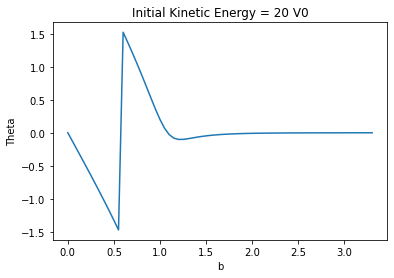

In [24]:
                 
b = 0.         # initialize b          

db = 0.05        # increment for increasing b
bmax = 3*2**(1/6)       # upper bound on b, twice r_min
bsteps = int(bmax/db)

b_data = np.zeros(bsteps)               # an array of the b values, for plotting 
theta_data = np.zeros(bsteps)           # make an array of the same size for the angles

V0 = 1.              
a = 1.                  
m = 1.                  

E = 20.  

dt = 0.001                
tmax = 25.
nsteps = int(tmax/dt)


for i in range(0, bsteps):
    x0 = -2.     # try changing the way I'm initializing
    y0 = b                          # initial y value is just b
    v0x = math.sqrt(2*E/m)          # need to calculate initial x velocity from energy
    v0y = 0.                        # no initial velocity in the y to start 

    p = particle2(1., x0, y0, v0x, v0y)
    
    x = np.zeros(nsteps)
    y = np.zeros(nsteps)
    vx = np.zeros(nsteps) 
    vy = np.zeros(nsteps)
    #energy = np.zeros(nsteps)
    
    b_data[i] = b
    
    for j in range(0, nsteps):
        r = math.sqrt(p.x*p.x+p.y*p.y)
        r8 = r**(8)
        r14 = r**(14)
        fx = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.x
        fy = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.y
        p.euler(fx, fy, dt)

        x[j] = p.x
        y[j] = p.y
        vx[j] = p.vx
        vy[j] = p.vy
        #energy[j] = 0.5*(p.vx**2+p.vy**2) + 4*V0*((a/math.sqrt(p.x*p.x+p.y*p.y))**(12) - (a/math.sqrt(p.x*p.x+p.y*p.y))**(6))
    
    theta_data[i] = np.arctan(vy[-1]/vx[-1])
        
    b += db
    
    
pyplot.plot(b_data, theta_data)
pyplot.xlabel('b')
pyplot.ylabel('Theta');
pyplot.title('Initial Kinetic Energy = 20 V0');

The bounce (first discontinuity) shifts to lower b but does not disappear at higher energy. The next discontinuity, and then the second maximum in theta (due to orbiting behavior?) do disappear at higher energies. 

Calculate some interesting trajectories.

The particle is scattered into an angle of 0.0008160356969102197 radians, or 0.04675540136497243 degrees
The initial velocity was [1.00003602704874,-2.5651258702957076e-05]
The final velocity was [0.981669401089674,0.0008010774516699572]


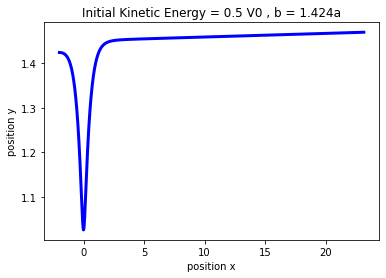

In [25]:
b = 1.424      # Should roughly give maximum scattering.
V0 = 1.               # set the energy scale
a = 1.                  # set the length scale
m = 1.                  # set the particle mass

E = 0.5                  # problem statement asks us to set the initial kinetic energy

x0 = -2.     # Changed!
y0 = b                          # initial y value is just b
v0x = math.sqrt(2*E/m)          # need to calculate initial x velocity from energy
v0y = 0.                        # no initial velocity in the y to start 

dt = 0.001                # time step
tmax = 25.
nsteps = int(tmax/dt)

x = np.zeros(nsteps)
y = np.zeros(nsteps)
vx = np.zeros(nsteps) 
vy = np.zeros(nsteps)
energy = np.zeros(nsteps)

x[0] = x0
y[0] = y0
vx[0] = v0x
vy[0] = v0y
 

p = particle2(1., x0, y0, v0x, v0y)

for i in range(0,nsteps):
    r = math.sqrt(p.x*p.x+p.y*p.y)
    r8 = r**(8)
    r14 = r**(14)
    fx = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.x
    fy = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.y
    p.euler(fx, fy, dt)

    x[i] = p.x
    y[i] = p.y
    vx[i] = p.vx
    vy[i] = p.vy
   

t = np.linspace(0.,tmax,nsteps)

theta = np.arctan(vy[-1]/vx[-1])    # Calculate the final angle using the final velocity

print(f'The particle is scattered into an angle of {theta} radians, or {theta*180/math.pi} degrees')
print(f'The initial velocity was [{vx[0]},{vy[0]}]')
print(f'The final velocity was [{vx[-1]},{vy[-1]}]')


# Plot my positions to see what's happening

pyplot.plot(x, y, color='blue', ls='-', lw=3)

pyplot.xlabel('position x')
pyplot.ylabel('position y');
pyplot.title('Initial Kinetic Energy = 0.5 V0 , b = 1.424a');




This one is interesting. I arrived at it by playing with b between 1.4 and 1.5. I'm curious to look for smaller times.

The particle is scattered into an angle of 0.0012978873594439164 radians, or 0.07436346797951526 degrees
The initial velocity was [1.00003602704874,-2.5651258702957076e-05]
The final velocity was [0.983030246943558,0.0012758632478613021]


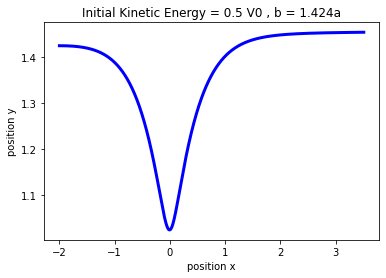

In [26]:
b = 1.424      # Should roughly give maximum scattering.
V0 = 1.               # set the energy scale
a = 1.                  # set the length scale
m = 1.                  # set the particle mass

E = 0.5                  # problem statement asks us to set the initial kinetic energy

x0 = -2.     # Changed!
y0 = b                          # initial y value is just b
v0x = math.sqrt(2*E/m)          # need to calculate initial x velocity from energy
v0y = 0.                        # no initial velocity in the y to start 

dt = 0.001                # time step
tmax = 5.
nsteps = int(tmax/dt)

x = np.zeros(nsteps)
y = np.zeros(nsteps)
vx = np.zeros(nsteps) 
vy = np.zeros(nsteps)
energy = np.zeros(nsteps)

x[0] = x0
y[0] = y0
vx[0] = v0x
vy[0] = v0y
 

p = particle2(1., x0, y0, v0x, v0y)

for i in range(0,nsteps):
    r = math.sqrt(p.x*p.x+p.y*p.y)
    r8 = r**(8)
    r14 = r**(14)
    fx = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.x
    fy = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.y
    p.euler(fx, fy, dt)

    x[i] = p.x
    y[i] = p.y
    vx[i] = p.vx
    vy[i] = p.vy
   

t = np.linspace(0.,tmax,nsteps)

theta = np.arctan(vy[-1]/vx[-1])    # Calculate the final angle using the final velocity

print(f'The particle is scattered into an angle of {theta} radians, or {theta*180/math.pi} degrees')
print(f'The initial velocity was [{vx[0]},{vy[0]}]')
print(f'The final velocity was [{vx[-1]},{vy[-1]}]')


# Plot my positions to see what's happening

pyplot.plot(x, y, color='blue', ls='-', lw=3)

pyplot.xlabel('position x')
pyplot.ylabel('position y');
pyplot.title('Initial Kinetic Energy = 0.5 V0 , b = 1.424a');





The particle is scattered into an angle of 0.9627465431074825 radians, or 55.16131366086852 degrees
The initial velocity was [1.0000173776949413,-1.5639925447086023e-05]
The final velocity was [-0.5652368812170686,-0.8120986928665427]


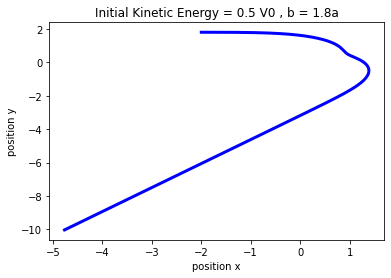

In [27]:
b = 1.8      # Should roughly give maximum scattering.
V0 = 1.               # set the energy scale
a = 1.                  # set the length scale
m = 1.                  # set the particle mass

E = 0.5                  # problem statement asks us to set the initial kinetic energy

x0 = -2.     # Changed!
y0 = b                          # initial y value is just b
v0x = math.sqrt(2*E/m)          # need to calculate initial x velocity from energy
v0y = 0.                        # no initial velocity in the y to start 

dt = 0.001                # time step
tmax = 15.
nsteps = int(tmax/dt)

x = np.zeros(nsteps)
y = np.zeros(nsteps)
vx = np.zeros(nsteps) 
vy = np.zeros(nsteps)
energy = np.zeros(nsteps)

x[0] = x0
y[0] = y0
vx[0] = v0x
vy[0] = v0y
 

p = particle2(1., x0, y0, v0x, v0y)

for i in range(0,nsteps):
    r = math.sqrt(p.x*p.x+p.y*p.y)
    r8 = r**(8)
    r14 = r**(14)
    fx = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.x
    fy = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.y
    p.euler(fx, fy, dt)

    x[i] = p.x
    y[i] = p.y
    vx[i] = p.vx
    vy[i] = p.vy
   

t = np.linspace(0.,tmax,nsteps)

theta = np.arctan(vy[-1]/vx[-1])    # Calculate the final angle using the final velocity

print(f'The particle is scattered into an angle of {theta} radians, or {theta*180/math.pi} degrees')
print(f'The initial velocity was [{vx[0]},{vy[0]}]')
print(f'The final velocity was [{vx[-1]},{vy[-1]}]')


# Plot my positions to see what's happening

pyplot.plot(x, y, color='blue', ls='-', lw=3)

pyplot.xlabel('position x')
pyplot.ylabel('position y');
pyplot.title('Initial Kinetic Energy = 0.5 V0 , b = 1.8a');





There is a change between b = 1.7 and 1.8.

The particle is scattered into an angle of 1.475071998821681 radians, or 84.51540001040865 degrees
The initial velocity was [1.0000191838016521,-1.678582644552757e-05]
The final velocity was [-0.09449088431322915,-0.9840977582324875]


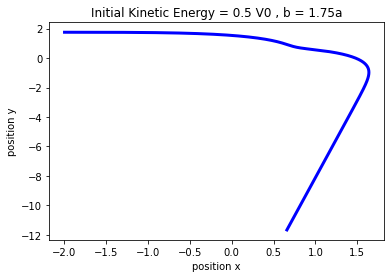

In [28]:
b = 1.75    # Should roughly give maximum scattering.
V0 = 1.               # set the energy scale
a = 1.                  # set the length scale
m = 1.                  # set the particle mass

E = 0.5                  # problem statement asks us to set the initial kinetic energy

x0 = -2.     # Changed!
y0 = b                          # initial y value is just b
v0x = math.sqrt(2*E/m)          # need to calculate initial x velocity from energy
v0y = 0.                        # no initial velocity in the y to start 

dt = 0.001                # time step
tmax = 15.
nsteps = int(tmax/dt)

x = np.zeros(nsteps)
y = np.zeros(nsteps)
vx = np.zeros(nsteps) 
vy = np.zeros(nsteps)
energy = np.zeros(nsteps)

x[0] = x0
y[0] = y0
vx[0] = v0x
vy[0] = v0y
 

p = particle2(1., x0, y0, v0x, v0y)

for i in range(0,nsteps):
    r = math.sqrt(p.x*p.x+p.y*p.y)
    r8 = r**(8)
    r14 = r**(14)
    fx = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.x
    fy = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.y
    p.euler(fx, fy, dt)

    x[i] = p.x
    y[i] = p.y
    vx[i] = p.vx
    vy[i] = p.vy
   

t = np.linspace(0.,tmax,nsteps)

theta = np.arctan(vy[-1]/vx[-1])    # Calculate the final angle using the final velocity

print(f'The particle is scattered into an angle of {theta} radians, or {theta*180/math.pi} degrees')
print(f'The initial velocity was [{vx[0]},{vy[0]}]')
print(f'The final velocity was [{vx[-1]},{vy[-1]}]')


# Plot my positions to see what's happening

pyplot.plot(x, y, color='blue', ls='-', lw=3)

pyplot.xlabel('position x')
pyplot.ylabel('position y');
pyplot.title('Initial Kinetic Energy = 0.5 V0 , b = 1.75a');





It looks like it is slightly deflected, but it is at a sweet spot where it is deflected just slightly back into the attractive region for enough time that it begins to orbit. 

The particle is scattered into an angle of 0.15732091773098644 radians, or 9.013824615110362 degrees
The initial velocity was [1.0000157366090743,-1.4556363393704807e-05]
The final velocity was [-0.9779741050035644,-0.15513778052391933]


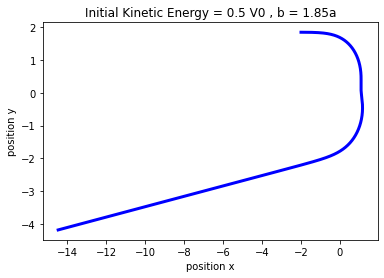

In [29]:
b = 1.85    # Should roughly give maximum scattering.
V0 = 1.               # set the energy scale
a = 1.                  # set the length scale
m = 1.                  # set the particle mass

E = 0.5                  # problem statement asks us to set the initial kinetic energy

x0 = -2.     # Changed!
y0 = b                          # initial y value is just b
v0x = math.sqrt(2*E/m)          # need to calculate initial x velocity from energy
v0y = 0.                        # no initial velocity in the y to start 

dt = 0.001                # time step
tmax = 20.
nsteps = int(tmax/dt)

x = np.zeros(nsteps)
y = np.zeros(nsteps)
vx = np.zeros(nsteps) 
vy = np.zeros(nsteps)
energy = np.zeros(nsteps)

x[0] = x0
y[0] = y0
vx[0] = v0x
vy[0] = v0y
 

p = particle2(1., x0, y0, v0x, v0y)

for i in range(0,nsteps):
    r = math.sqrt(p.x*p.x+p.y*p.y)
    r8 = r**(8)
    r14 = r**(14)
    fx = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.x
    fy = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.y
    p.euler(fx, fy, dt)

    x[i] = p.x
    y[i] = p.y
    vx[i] = p.vx
    vy[i] = p.vy
   

t = np.linspace(0.,tmax,nsteps)

theta = np.arctan(vy[-1]/vx[-1])    # Calculate the final angle using the final velocity

print(f'The particle is scattered into an angle of {theta} radians, or {theta*180/math.pi} degrees')
print(f'The initial velocity was [{vx[0]},{vy[0]}]')
print(f'The final velocity was [{vx[-1]},{vy[-1]}]')


# Plot my positions to see what's happening

pyplot.plot(x, y, color='blue', ls='-', lw=3)

pyplot.xlabel('position x')
pyplot.ylabel('position y');
pyplot.title('Initial Kinetic Energy = 0.5 V0 , b = 1.85a');






We see that it is spending more and more time near the scatterer. 

The particle is scattered into an angle of 0.9703970364117717 radians, or 55.59965463839739 degrees
The initial velocity was [1.0000142471253044,-1.3534769039284592e-05]
The final velocity was [0.559849883198575,0.817629560287563]


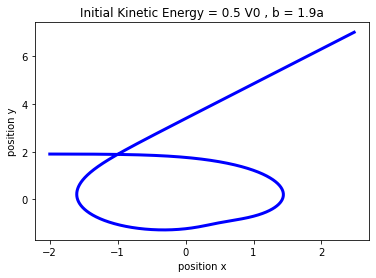

In [30]:
b = 1.9    # Should roughly give maximum scattering.
V0 = 1.               # set the energy scale
a = 1.                  # set the length scale
m = 1.                  # set the particle mass

E = 0.5                  # problem statement asks us to set the initial kinetic energy

x0 = -2.     # Changed!
y0 = b                          # initial y value is just b
v0x = math.sqrt(2*E/m)          # need to calculate initial x velocity from energy
v0y = 0.                        # no initial velocity in the y to start 

dt = 0.001                # time step
tmax = 15.
nsteps = int(tmax/dt)

x = np.zeros(nsteps)
y = np.zeros(nsteps)
vx = np.zeros(nsteps) 
vy = np.zeros(nsteps)
energy = np.zeros(nsteps)

x[0] = x0
y[0] = y0
vx[0] = v0x
vy[0] = v0y
 

p = particle2(1., x0, y0, v0x, v0y)

for i in range(0,nsteps):
    r = math.sqrt(p.x*p.x+p.y*p.y)
    r8 = r**(8)
    r14 = r**(14)
    fx = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.x
    fy = (4*V0/m)*(12*a**(12)*(1/r14) - 6*a**(6)*(1/r8))*p.y
    p.euler(fx, fy, dt)

    x[i] = p.x
    y[i] = p.y
    vx[i] = p.vx
    vy[i] = p.vy
   

t = np.linspace(0.,tmax,nsteps)

theta = np.arctan(vy[-1]/vx[-1])    # Calculate the final angle using the final velocity

print(f'The particle is scattered into an angle of {theta} radians, or {theta*180/math.pi} degrees')
print(f'The initial velocity was [{vx[0]},{vy[0]}]')
print(f'The final velocity was [{vx[-1]},{vy[-1]}]')


# Plot my positions to see what's happening

pyplot.plot(x, y, color='blue', ls='-', lw=3)

pyplot.xlabel('position x')
pyplot.ylabel('position y');
pyplot.title('Initial Kinetic Energy = 0.5 V0 , b = 1.9a');






At b = 1.9 it is actually orbiting the scatterer before flying back off again. This is something that we can't really see in theta itself, but that we can tell must be happening from the discontinuities in the profile of theta with respect to b. 